![alt text](https://wallpaperaccess.com/full/389007.jpg)

---
# **ANÁLISE DOS DADOS DO AIRBNB - ROMA**
---
---

Última atualização em 20 de março de 2020

---
Diariamente, nota-se a crescente procura de brasileiros por residência no exterior, seja para trabalho, estudos, turismo ou outras atividades. Tendo em vista toda essa demanda, vários países da Europa, América do Norte e Ásia, através de programas de incentivo, estão abrindo as portas para receber profissionais de diversas áreas que consigam contribuir para o desenvolvimento de novas tecnologias e o crescimento das suas economias.


Um dos destinos mais pesquisados no mundo é a cidade de Roma, capital da Itália, que possui pouco mais de 3 milhões habitantes. Conhecida por seus monumentos históricos e alta gastronomia, a capital italiana chama a atenção não apenas pelO clima agradável que aquele país oferece, mas também por apresentar uma das melhores médias salariais do mundo e instituições de ensino de qualidade, além de ser uma excelente opção para quem deseja empreender na Europa.

Seja para trabalho ou estudos, a necessidade de se estabelecer em uma residência é indiscutível. Em especial, para aqueles que desejam visitar a cidade de Roma apenas para turismo, podem contar com um recurso que facilita bastante a pesquisar por bons locais de hospedagem, a plataforma de buscas [Airbnb](https://www.airbnb.com.br/). 

Fundado em 2008, o serviço online Airbnb permite que as pessoas anunciem, pesquisem e reservem acomodações e meios de hospedagem. **Abrangendo seus serviços em mais de 190 países, até o ano de 2019 a startup já havia hospedado mais de 500 milhões de pessoas ao redor do mundo e faturado mais de U$ 65 bilhões**, ocupando o posto de maior empresa hoteleira do planeta. Atualmente, o Airbnb oferece mais de 6 milhões de opções de hospedagem, desde apartamentos ou quartos individuais, até algumas mais exóticas, como castelos ou casas na árvore. **E tudo isso se apoia em um fato bem curioso, o Airbnb não possui um hotel sequer.**

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="5%" src="https://logodownload.org/wp-content/uploads/2016/10/Airbnb-Logo-9.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, capital da Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**
---

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*


In [ ]:
# Antes de inicarmos as primeiras ações no nosso projeto, devemos importar os pacotes necessários.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Devemos importar também o arquivo a ser analisado listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2019-11-16/visualisations/listings.csv")

In [ ]:
# Podemos, através do comando "df.columns" visualizar o nomes de todas as colunas existentes no nosso conjunto de dados.

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Através do comando "df.shape", conseguirmos ver a dimensão do nosso conjunto de dados.

In [ ]:
df.shape

(30898, 16)

Ou seja, o nosso *dataset* possui 30898 linhas e 16 colunas.

---



## **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

> Indented block





* `id` - *Número de id gerado para identificar o imóvel;*

* `name` - *Nome da propriedade anunciada;*

* `host_id` - *Número de id do proprietário (anfitrião) da propriedade;*

* `host_name` - *Nome do anfitrião;*

* `neighbourhood_group` - *Esta coluna não contém nenhum valor válido;*

* `neighbourhood` - *Nome do bairro;*

* `latitude` - *Coordenada da latitude da propriedade;*

* `longitude` - *Coordenada da longitude da propriedade;*

* `room_type` - *Informa o tipo de quarto que é oferecido;*

* `price` - *Preço para alugar o imóvel;*

* `minimum_nights` - *Quantidade mínima de noites para reservar;*

* `number_of_reviews` - *Número de reviews que a propriedade possui;*

* `last_review` - *Data do último review;*

* `reviews_per_month` - *Quantidade de reviews por mês;*

* `calculated_host_listings_count` - *Quantidade de imóveis do mesmo anfitrião;*

* `availability_365` - *Número de dias de disponibilidade dentro de 365 dias.*


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# Mostrar as 5 primeiras entradas.

df.head()

# Podemos observar que a coluna de posição 4 (neighbourhood_group) não contém informações listadas.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.12,5,365
1,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.16,7,335
2,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,141,2019-10-27,1.35,1,344
3,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,100,3,39,2015-07-19,0.35,1,365
4,14181,Beautiful apt close to the Vatican,51913,Ivan,NaN,I Centro Storico,41.91485,12.45321,Private room,27,7,28,2019-02-27,0.24,1,88


---

### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 30898 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 30898
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [ ]:
# Inicialmente, podemos checar se existem células nulas no nosso banco de dados, ou seja, se há células vazias. 
#Isso pode ser feito através do comando "df.isnull()".

df.isnull().head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Contudo, é mais interessante sabermos o total de células vazias em cada coluna do nosso dataset. 
#Para isso, utilizamos o comando anterior "df.isnull()" e acrescentamos outro comando para executar a soma. Assim, temos: "df.isnull().sum()".

df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             7
neighbourhood_group               30898
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5483
reviews_per_month                  5483
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Em seguida, podemos analisar a porcentagem de células vazias no nosso dataset atribuindo o seguinte comando.

((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))*100

neighbourhood_group               100.000000
reviews_per_month                  17.745485
last_review                        17.745485
name                                0.038837
host_name                           0.022655
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` quase 18% dos seus valores nulos.
* As variáveis `name` e `host_name` têm aproximadamente 0,038% e 0,022% dos valores nulos, respectivamente.

### **3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

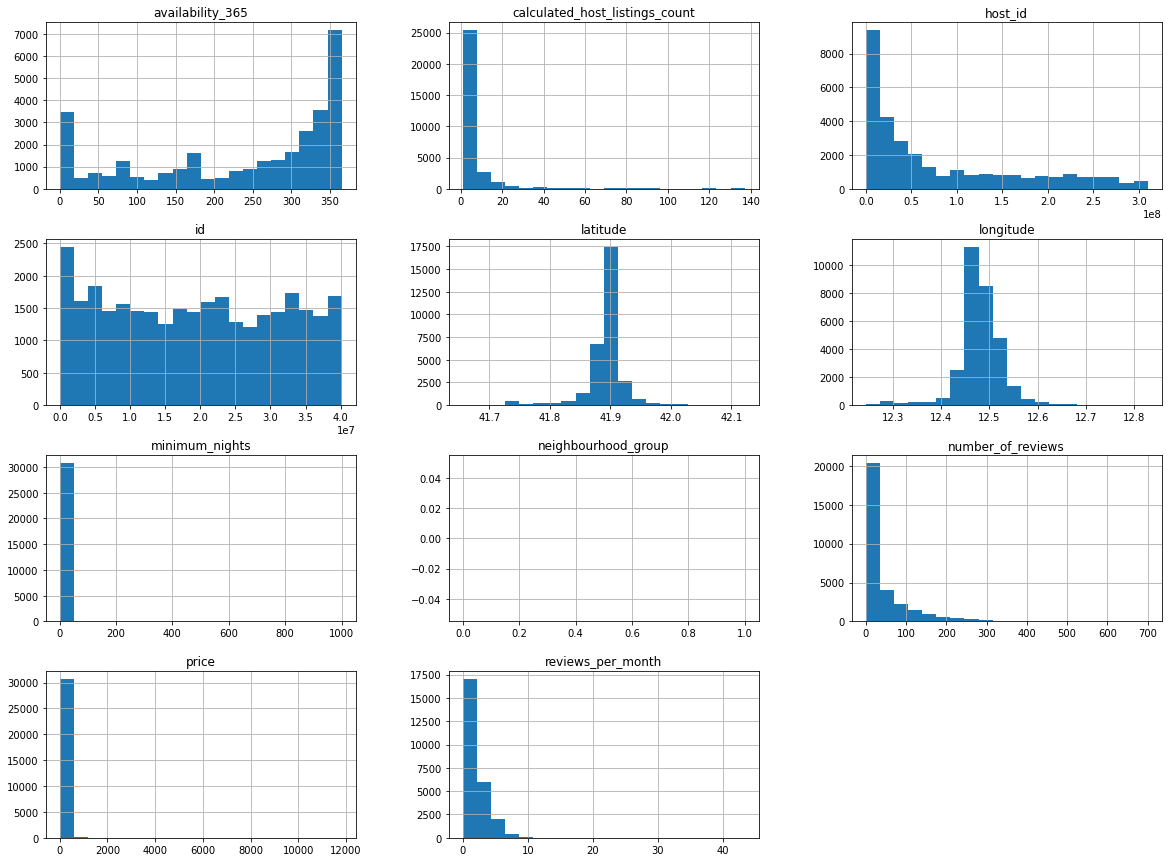

In [ ]:
# Plotar o histograma das variáveis numéricas

df.hist(bins=20, figsize=(20,15));

### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30898.000000,30898.000000,30898.000000,25415.000000,30898.000000,30898.000000
mean,104.558289,2.897728,43.176322,1.791425,6.880769,233.925335
std,194.178140,13.835430,67.705803,1.754309,15.842834,126.434662
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,2.000000,0.380000,1.000000,135.000000
50%,75.000000,2.000000,13.000000,1.230000,2.000000,287.000000
75%,113.000000,3.000000,56.000000,2.760000,5.000000,344.000000
max,11818.000000,1000.000000,700.000000,43.380000,137.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 113, porém seu valor máximo é 11818.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights


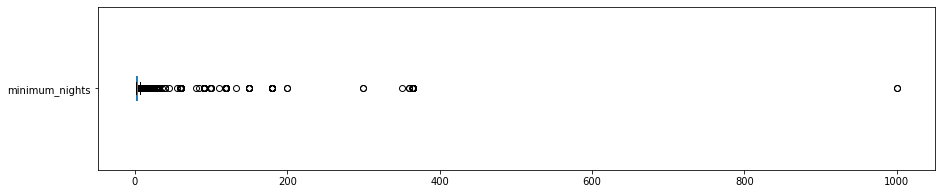

minimum_nights: valores acima de 30:
149 entradas
0.4822%


In [ ]:
# minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

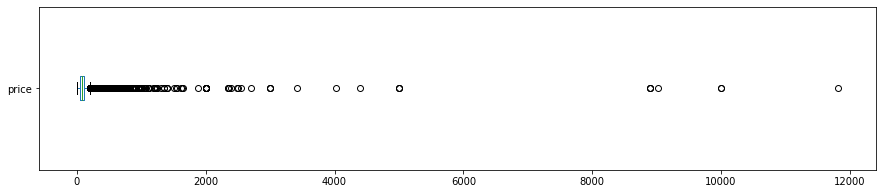


price: valores acima de 1500
37 entradas
0.1197%


In [ ]:
# price

df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

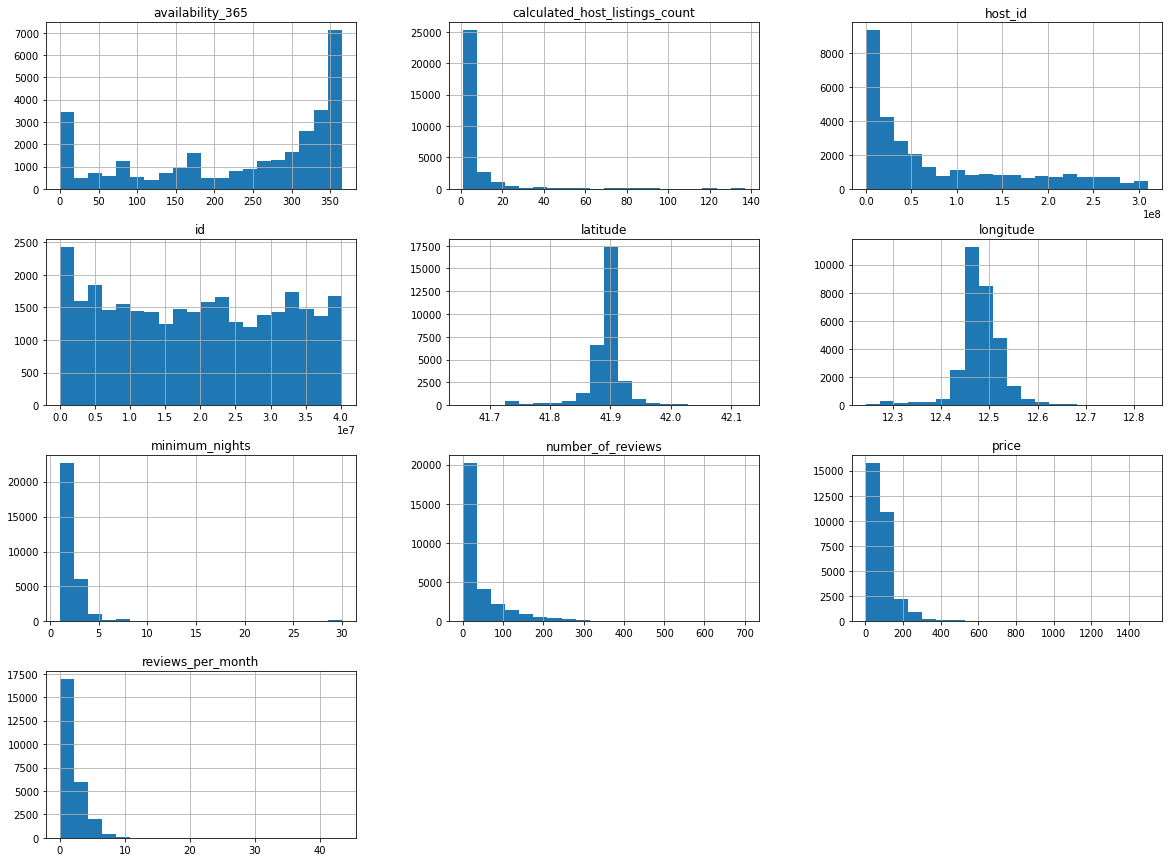

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,15));

É fundamental fazermos a identificação de *outilers* dentro do nosso conjunto de dados, uma vez que eles interferem diretamente na nossa análise estatística. Identificar corretamente e eliminar os *outilers*, nos permite melhorar as inferências feitas a partir daqueles dados, obtendo os resultados de maneira mais exata.

### **5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008236,-0.084129,-0.074108,0.133044,0.106913
minimum_nights,-0.008236,1.000000,-0.045859,-0.114719,-0.012009,-0.059390
number_of_reviews,-0.084129,-0.045859,1.000000,0.628027,-0.071569,0.063364
reviews_per_month,-0.074108,-0.114719,0.628027,1.000000,-0.068662,0.009875
calculated_host_listings_count,0.133044,-0.012009,-0.071569,-0.068662,1.000000,0.016817
availability_365,0.106913,-0.059390,0.063364,0.009875,0.016817,1.000000


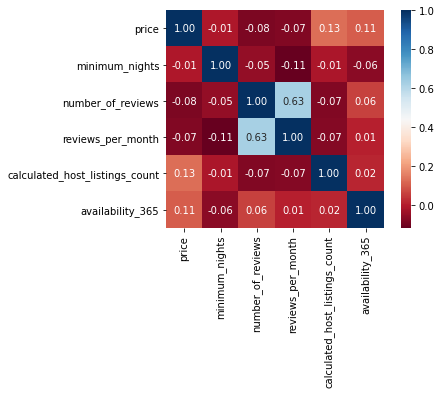

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [ ]:
# Mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    19974
Private room        8691
Hotel room          1823
Shared room          224
Name: room_type, dtype: int64

In [ ]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    65.036468
Private room       28.298385
Hotel room          5.935791
Shared room         0.729357
Name: room_type, dtype: float64

### **7. Qual a localidade mais cara de Roma?**


Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              124.316350
IX Eur                         92.950392
XV Cassia/Flaminia             87.118674
XIII Aurelia                   86.724775
II Parioli/Nomentano           83.867418
XII Monte Verde                76.862757
XIV Monte Mario                73.586854
VIII Appia Antica              73.174242
X Ostia/Acilia                 71.031250
VII San Giovanni/Cinecittà     67.759222
Name: price, dtype: float64

Desta forma, podemos verifica-se que as duas localidades mais caras em Roma são, respectivamente:

* **I Centro Storico** - onde encontram-se grandes monumentos como o Coliseu e Pantheon;

* **IX Eur** - uma das atrações mais conhecidas é o 
Museu Nacional de Pré-História e Etnografia "*Luigi Pigorini*".


**Podemos ainda extrair informações referentes a cada localidade individualmente. Por exemplo, conseguimos ver a quantidade de imóveis disponíveis na região de VII San Giovanni/Cinecittà, destacada por ser a que possui os imóveis com os menores preços em Roma.**

In [ ]:
# Ver a quantidade de imóveis no VII San Giovanni/Cinecittà
print(df[df.neighbourhood == "VII San Giovanni/Cinecittà"].shape)

# Ver todas as entradas do VII San Giovanni/Cinecittà
df[df.neighbourhood == "VII San Giovanni/Cinecittà"]

(2485, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14,21249,"B&B 830, 10 min. from everything! - ROME",81015,Emanuele,NaN,VII San Giovanni/Cinecittà,41.86272,12.54795,Entire home/apt,45,3,107,2019-10-23,0.93,9,349
65,54991,la Casetta di Tiziana near the imperial Rome,259007,Tiziana,NaN,VII San Giovanni/Cinecittà,41.87544,12.50638,Entire home/apt,50,2,204,2019-10-30,1.93,1,237
79,64683,Attic Sannio with terrace,316068,Federico,NaN,VII San Giovanni/Cinecittà,41.88307,12.50436,Entire home/apt,68,3,152,2019-10-25,1.46,46,305
80,65104,"Central 3bdr apt , A/C, WIFI",318301,Andrea,NaN,VII San Giovanni/Cinecittà,41.88301,12.51498,Entire home/apt,99,3,296,2019-11-10,2.91,5,155
86,69146,Rome Apartment beautiful ..,345563,Giandomenico,NaN,VII San Giovanni/Cinecittà,41.88292,12.53103,Entire home/apt,65,2,71,2018-09-24,0.68,1,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30862,40102969,Loft Rome Center,78405003,Francesco,NaN,VII San Giovanni/Cinecittà,41.87440,12.51858,Entire home/apt,35,1,0,NaN,NaN,4,219
30866,40106080,Comfort apartment 20 min to city center/Termini,264118925,Pamela,NaN,VII San Giovanni/Cinecittà,41.85814,12.55987,Entire home/apt,48,1,0,NaN,NaN,3,73
30867,40106728,Comfort room for 3/20 min from city center/Ter...,264118925,Pamela,NaN,VII San Giovanni/Cinecittà,41.85784,12.56012,Private room,24,1,0,NaN,NaN,3,73
30870,40107348,Comfort double room 20 min to city center/Termini,264118925,Pamela,NaN,VII San Giovanni/Cinecittà,41.85927,12.56006,Private room,23,1,0,NaN,NaN,3,65


**Assim, conseguimos descobrir que na região de VII San Giovanni/Cinecittà, são ofertados 2485 locais para locação, além de visualizarmos os nomes dos donos dos imóveis e a localização exata.**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

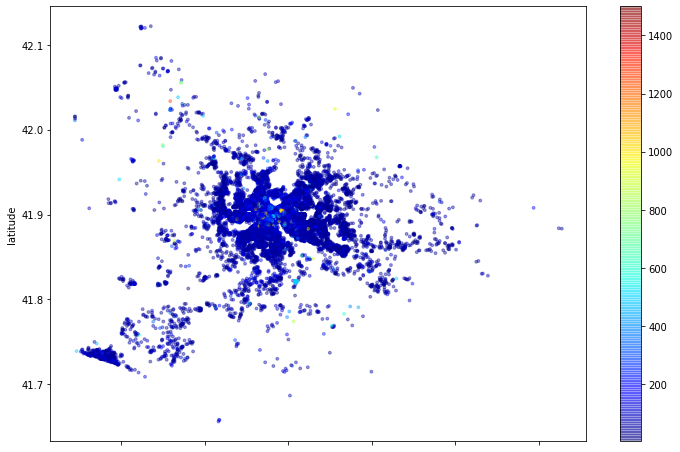

In [ ]:
# Plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**
---
Foi realizada apenas uma análise superficial na base de dados do Airbnb, e ainda que alguns *outliers* foram encontrados, prejudicando nossas análises, conseguimos extratir diversas informação essenciais para quem deseja se hospedar nesses locais, como faixa de preços, quantidade de imóveis disponíveis e seus tipos.

Também se notou que na cidade de Roma existem muitas localidades disponíveis, fato que ao mesmo tempo ajuda na nossa análise, pois dessa forma conseguimos boa representatividade devido a boa amostragem, mas que pode dificultar um pouco pelo volume de dados a serem tratados.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise aprodundada, o conjunto de dados completos, com 106 atributos disponíveis na plataforma do Airbnb. Permitindo assim uma maior possibilidade de cruzamentos de dados, ajudando a identificar outras parâmetros importantes.

---